#Assignment 9

Created a new package Visionaire which includes all my code files

### Import Package and modules

In [1]:
!python -m pip install --upgrade git+https://github.com/vigneshbabupj/Pyvisionaire.git#egg=Visionaire

  Cloning https://github.com/vigneshbabupj/Pyvisionaire.git to /tmp/pip-install-p3fhxoi_/Visionaire
  Running command git clone -q https://github.com/vigneshbabupj/Pyvisionaire.git /tmp/pip-install-p3fhxoi_/Visionaire
     |████████████████████████████████| 634kB 9.3MB/s 
  Created wheel for Visionaire: filename=Visionaire-0.1-cp36-none-any.whl size=28691 sha256=386d8bb71d561d08f2192d280aeaa07b34272ceb8cdac045385917eecdcfd3f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-kf150512/wheels/a9/30/73/2f36cd4e50caa9c3f79eb5e5351ff2e34d0a5100762390ba5c
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=bf468b968b85b4d584a520bd011d46f1ae3b2ced986c6fda78c18675eb7cde57
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built Visionaire imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [2]:
 pip install -U git+https://github.com/albumentations-team/albumentations

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-0e1h2d1a
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-0e1h2d1a
     |████████████████████████████████| 952kB 8.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=69177 sha256=fbb6f5df486b23b94aa28d664ca2a550269b8a253269ca31ffd16c2b8db86288
  Stored in directory: /tmp/pip-ephem-wheel-cache-fluk2k24/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: imgaug 0.2.6
    Uninstalling imgaug-0.2.6:
      Successfully uninstalled imgaug-0.2.6
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [3]:
from Visionaire.data_loader import CIFAR10_dataloader
from Visionaire.models.resnet import ResNet18
from Visionaire.train import train
from Visionaire.test import test
from Visionaire.utils import incorrect_Classification,plot_performace, class_accuracy
from Visionaire.gradcam import plot_grad_cam


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

### Assign Cuda 

In [5]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

seed=121

torch.manual_seed(seed)

print("Using Cuda : ", use_cuda)


Using Cuda :  True


### Load CIFAR10 dataset

In [6]:
Batch_Size = 128

train_loader,test_loader, classes = CIFAR10_dataloader(Batch_Size, use_cuda)

Extracting /data/cifar-10-python.tar.gz to /data/
Files already downloaded and verified


### Model summary

In [7]:
from torchsummary import summary

model = ResNet18().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

### Model Trainer

In [8]:
model = ResNet18().to(device)

lambda_l1 = 0
lambda_l2 = 0

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=lambda_l2)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.01)

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_loss = train(model, device, train_loader, optimizer, lambda_l1,criterion)
    train_losses.append(sum(train_loss)/len(train_loss))
    train_accuracy.append(sum(train_acc)/len(train_acc))

    #scheduler.step()
    test_acc, test_loss = test(model, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracy.append(test_acc)

#model_file = 'models/'+versions+'.pth'
#torch.save(model.state_dict(), model_file)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Train: Batch id: 390 	Loss: 1.138332	 Accuracy:49.384: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008139, Accuracy: 6270/10000 (62.700%)

EPOCH: 1


Train: Batch id: 390 	Loss: 0.731058	 Accuracy:67.606: 100%|██████████| 391/391 [00:22<00:00, 17.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.006241, Accuracy: 7291/10000 (72.910%)

EPOCH: 2


Train: Batch id: 390 	Loss: 0.486603	 Accuracy:74.702: 100%|██████████| 391/391 [00:22<00:00, 17.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005566, Accuracy: 7639/10000 (76.390%)

EPOCH: 3


Train: Batch id: 390 	Loss: 0.402940	 Accuracy:78.310: 100%|██████████| 391/391 [00:22<00:00, 17.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005420, Accuracy: 7681/10000 (76.810%)

EPOCH: 4


Train: Batch id: 390 	Loss: 0.685824	 Accuracy:81.288: 100%|██████████| 391/391 [00:22<00:00, 17.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005662, Accuracy: 7710/10000 (77.100%)

EPOCH: 5


Train: Batch id: 390 	Loss: 0.309126	 Accuracy:83.500: 100%|██████████| 391/391 [00:22<00:00, 17.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005339, Accuracy: 7848/10000 (78.480%)

EPOCH: 6


Train: Batch id: 390 	Loss: 0.348247	 Accuracy:85.102: 100%|██████████| 391/391 [00:22<00:00, 17.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004172, Accuracy: 8316/10000 (83.160%)

EPOCH: 7


Train: Batch id: 390 	Loss: 0.471789	 Accuracy:86.846: 100%|██████████| 391/391 [00:22<00:00, 17.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004556, Accuracy: 8213/10000 (82.130%)

EPOCH: 8


Train: Batch id: 390 	Loss: 0.555529	 Accuracy:88.076: 100%|██████████| 391/391 [00:22<00:00, 17.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004315, Accuracy: 8298/10000 (82.980%)

EPOCH: 9


Train: Batch id: 390 	Loss: 0.417777	 Accuracy:89.028: 100%|██████████| 391/391 [00:22<00:00, 17.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004124, Accuracy: 8353/10000 (83.530%)

EPOCH: 10


Train: Batch id: 390 	Loss: 0.361552	 Accuracy:89.982: 100%|██████████| 391/391 [00:22<00:00, 17.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004175, Accuracy: 8411/10000 (84.110%)

EPOCH: 11


Train: Batch id: 390 	Loss: 0.341970	 Accuracy:90.972: 100%|██████████| 391/391 [00:22<00:00, 17.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004545, Accuracy: 8362/10000 (83.620%)

EPOCH: 12


Train: Batch id: 390 	Loss: 0.222409	 Accuracy:91.574: 100%|██████████| 391/391 [00:22<00:00, 17.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003733, Accuracy: 8561/10000 (85.610%)

EPOCH: 13


Train: Batch id: 390 	Loss: 0.409129	 Accuracy:92.454: 100%|██████████| 391/391 [00:22<00:00, 17.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004150, Accuracy: 8518/10000 (85.180%)

EPOCH: 14


Train: Batch id: 390 	Loss: 0.209151	 Accuracy:92.870: 100%|██████████| 391/391 [00:22<00:00, 17.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004793, Accuracy: 8465/10000 (84.650%)

EPOCH: 15


Train: Batch id: 390 	Loss: 0.133066	 Accuracy:93.522: 100%|██████████| 391/391 [00:22<00:00, 17.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003966, Accuracy: 8580/10000 (85.800%)

EPOCH: 16


Train: Batch id: 390 	Loss: 0.142986	 Accuracy:93.972: 100%|██████████| 391/391 [00:22<00:00, 17.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004604, Accuracy: 8400/10000 (84.000%)

EPOCH: 17


Train: Batch id: 390 	Loss: 0.172868	 Accuracy:94.184: 100%|██████████| 391/391 [00:22<00:00, 17.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003505, Accuracy: 8713/10000 (87.130%)

EPOCH: 18


Train: Batch id: 390 	Loss: 0.121722	 Accuracy:94.810: 100%|██████████| 391/391 [00:22<00:00, 17.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004353, Accuracy: 8615/10000 (86.150%)

EPOCH: 19


Train: Batch id: 390 	Loss: 0.111911	 Accuracy:94.856: 100%|██████████| 391/391 [00:22<00:00, 17.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004500, Accuracy: 8509/10000 (85.090%)

EPOCH: 20


Train: Batch id: 390 	Loss: 0.091821	 Accuracy:95.068: 100%|██████████| 391/391 [00:22<00:00, 17.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003939, Accuracy: 8631/10000 (86.310%)

EPOCH: 21


Train: Batch id: 390 	Loss: 0.244899	 Accuracy:95.650: 100%|██████████| 391/391 [00:22<00:00, 17.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005058, Accuracy: 8446/10000 (84.460%)

EPOCH: 22


Train: Batch id: 390 	Loss: 0.051192	 Accuracy:95.966: 100%|██████████| 391/391 [00:22<00:00, 17.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004147, Accuracy: 8707/10000 (87.070%)

EPOCH: 23


Train: Batch id: 390 	Loss: 0.107640	 Accuracy:95.826: 100%|██████████| 391/391 [00:22<00:00, 17.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004166, Accuracy: 8703/10000 (87.030%)

EPOCH: 24


Train: Batch id: 390 	Loss: 0.147595	 Accuracy:96.442: 100%|██████████| 391/391 [00:22<00:00, 17.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004109, Accuracy: 8718/10000 (87.180%)

EPOCH: 25


Train: Batch id: 390 	Loss: 0.083848	 Accuracy:96.306: 100%|██████████| 391/391 [00:22<00:00, 17.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004669, Accuracy: 8653/10000 (86.530%)

EPOCH: 26


Train: Batch id: 390 	Loss: 0.089038	 Accuracy:96.522: 100%|██████████| 391/391 [00:22<00:00, 17.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004045, Accuracy: 8765/10000 (87.650%)

EPOCH: 27


Train: Batch id: 390 	Loss: 0.161649	 Accuracy:96.724: 100%|██████████| 391/391 [00:22<00:00, 17.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003967, Accuracy: 8789/10000 (87.890%)

EPOCH: 28


Train: Batch id: 390 	Loss: 0.019209	 Accuracy:96.842: 100%|██████████| 391/391 [00:22<00:00, 17.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003964, Accuracy: 8767/10000 (87.670%)

EPOCH: 29


Train: Batch id: 390 	Loss: 0.080088	 Accuracy:97.030: 100%|██████████| 391/391 [00:22<00:00, 17.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004113, Accuracy: 8733/10000 (87.330%)

EPOCH: 30


Train: Batch id: 390 	Loss: 0.090091	 Accuracy:97.102: 100%|██████████| 391/391 [00:22<00:00, 17.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003974, Accuracy: 8823/10000 (88.230%)

EPOCH: 31


Train: Batch id: 390 	Loss: 0.095932	 Accuracy:96.974: 100%|██████████| 391/391 [00:22<00:00, 17.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004155, Accuracy: 8729/10000 (87.290%)

EPOCH: 32


Train: Batch id: 390 	Loss: 0.062902	 Accuracy:97.188: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004305, Accuracy: 8756/10000 (87.560%)

EPOCH: 33


Train: Batch id: 390 	Loss: 0.133691	 Accuracy:97.274: 100%|██████████| 391/391 [00:22<00:00, 17.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004044, Accuracy: 8807/10000 (88.070%)

EPOCH: 34


Train: Batch id: 390 	Loss: 0.095976	 Accuracy:97.368: 100%|██████████| 391/391 [00:22<00:00, 17.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004763, Accuracy: 8669/10000 (86.690%)

EPOCH: 35


Train: Batch id: 390 	Loss: 0.123879	 Accuracy:97.422: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004071, Accuracy: 8840/10000 (88.400%)

EPOCH: 36


Train: Batch id: 390 	Loss: 0.145581	 Accuracy:97.460: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004694, Accuracy: 8752/10000 (87.520%)

EPOCH: 37


Train: Batch id: 390 	Loss: 0.055145	 Accuracy:97.684: 100%|██████████| 391/391 [00:22<00:00, 17.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004083, Accuracy: 8808/10000 (88.080%)

EPOCH: 38


Train: Batch id: 390 	Loss: 0.040750	 Accuracy:97.704: 100%|██████████| 391/391 [00:22<00:00, 17.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004933, Accuracy: 8731/10000 (87.310%)

EPOCH: 39


Train: Batch id: 390 	Loss: 0.042896	 Accuracy:97.800: 100%|██████████| 391/391 [00:22<00:00, 17.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004127, Accuracy: 8817/10000 (88.170%)

EPOCH: 40


Train: Batch id: 390 	Loss: 0.137884	 Accuracy:97.612: 100%|██████████| 391/391 [00:22<00:00, 17.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004908, Accuracy: 8684/10000 (86.840%)

EPOCH: 41


Train: Batch id: 390 	Loss: 0.020194	 Accuracy:97.806: 100%|██████████| 391/391 [00:22<00:00, 17.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004285, Accuracy: 8765/10000 (87.650%)

EPOCH: 42


Train: Batch id: 390 	Loss: 0.105175	 Accuracy:97.888: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004376, Accuracy: 8824/10000 (88.240%)

EPOCH: 43


Train: Batch id: 390 	Loss: 0.023391	 Accuracy:97.964: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004495, Accuracy: 8833/10000 (88.330%)

EPOCH: 44


Train: Batch id: 390 	Loss: 0.053532	 Accuracy:97.994: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004034, Accuracy: 8871/10000 (88.710%)

EPOCH: 45


Train: Batch id: 390 	Loss: 0.012325	 Accuracy:98.040: 100%|██████████| 391/391 [00:22<00:00, 17.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004637, Accuracy: 8816/10000 (88.160%)

EPOCH: 46


Train: Batch id: 390 	Loss: 0.047584	 Accuracy:98.252: 100%|██████████| 391/391 [00:22<00:00, 17.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004434, Accuracy: 8861/10000 (88.610%)

EPOCH: 47


Train: Batch id: 390 	Loss: 0.016908	 Accuracy:98.052: 100%|██████████| 391/391 [00:22<00:00, 17.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004613, Accuracy: 8811/10000 (88.110%)

EPOCH: 48


Train: Batch id: 390 	Loss: 0.098619	 Accuracy:98.240: 100%|██████████| 391/391 [00:22<00:00, 17.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004409, Accuracy: 8842/10000 (88.420%)

EPOCH: 49


Train: Batch id: 390 	Loss: 0.049384	 Accuracy:98.274: 100%|██████████| 391/391 [00:22<00:00, 17.18it/s]



Test set: loss: 0.004155, Accuracy: 8874/10000 (88.740%)



### Model performance

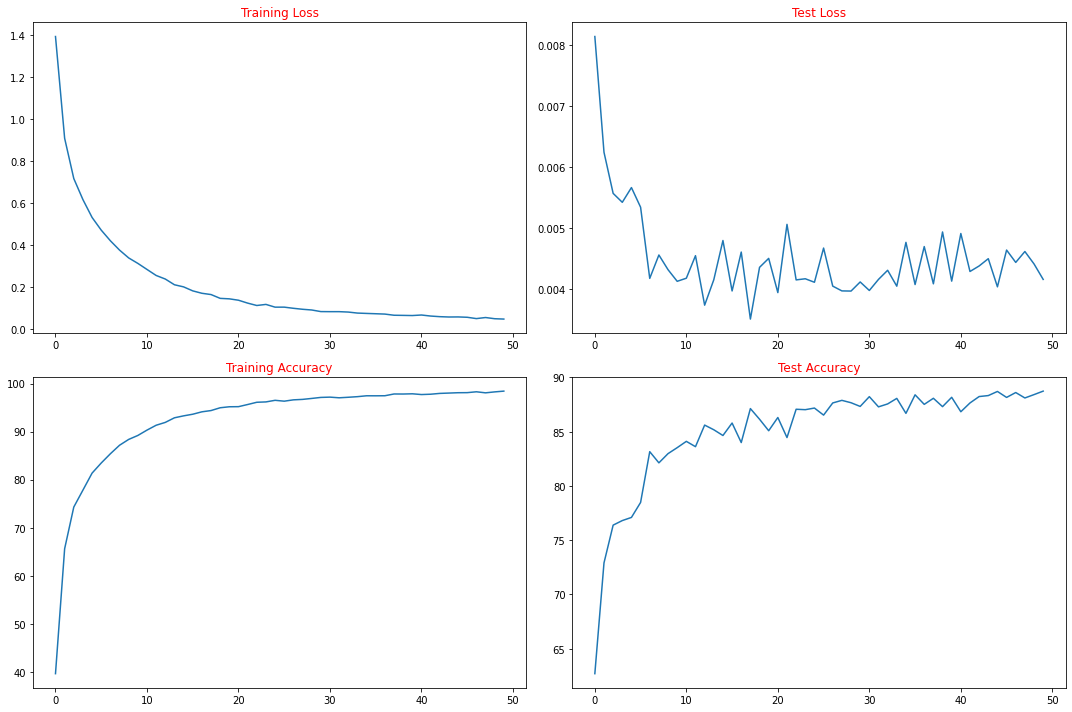

In [9]:
plot_performace(train_accuracy,test_accuracy,train_losses,test_losses)

### Grad Cam

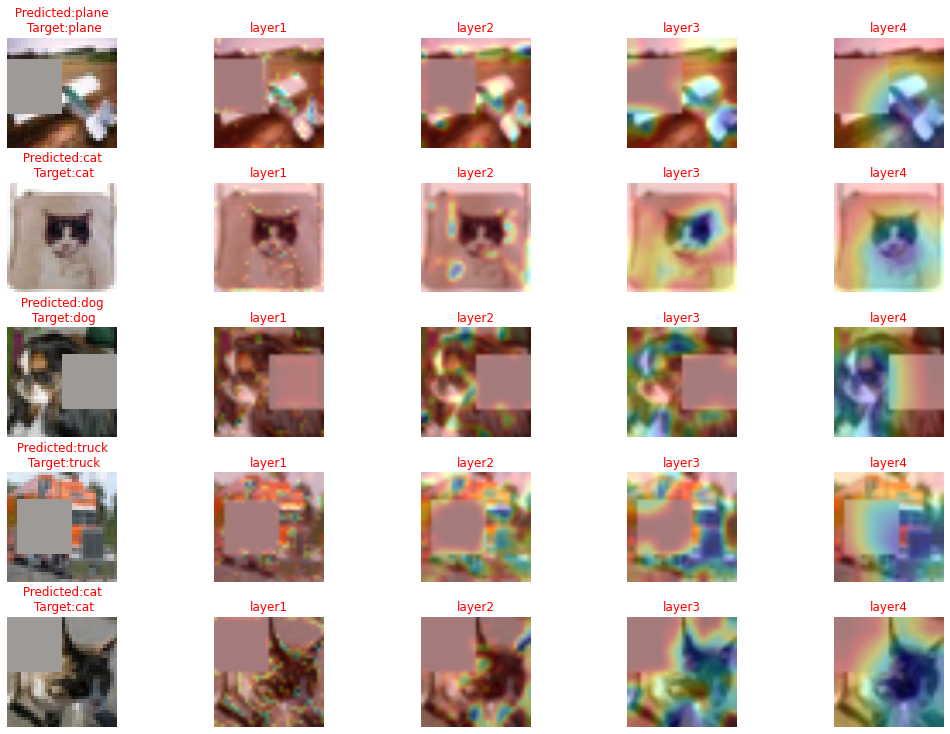

In [10]:
plot_grad_cam(model,classes,train_loader,device)

### Misclassification

/usr/local/lib/python3.6/dist-packages/Visionaire/utils.py:58: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = (pred.eq(target.data.view_as(pred))==False).nonzero() ## store incorrect images


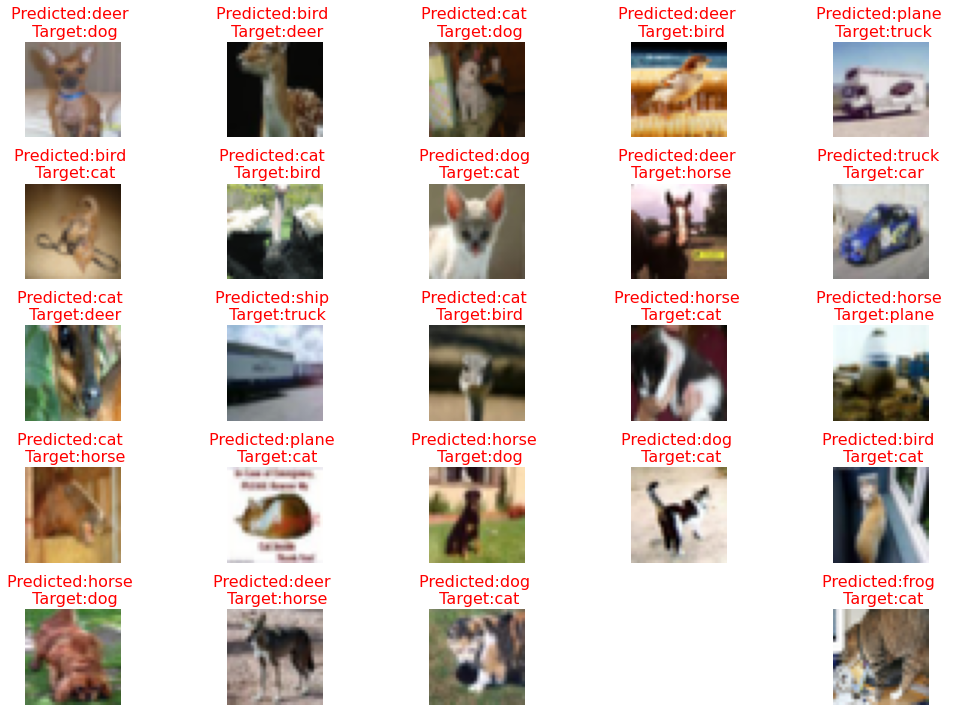

In [11]:
incorrect_Classification(model,classes,test_loader,device)

### Class wise accuracy

In [12]:
class_accuracy(classes,model,test_loader,device)

Accuracy of plane : 94 %
Accuracy of   car : 95 %
Accuracy of  bird : 75 %
Accuracy of   cat : 83 %
Accuracy of  deer : 97 %
Accuracy of   dog : 86 %
Accuracy of  frog : 93 %
Accuracy of horse : 90 %
Accuracy of  ship : 100 %
Accuracy of truck : 97 %
